In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread(r"C:\Users\mahit\OneDrive\Desktop\1dogg.jpg")

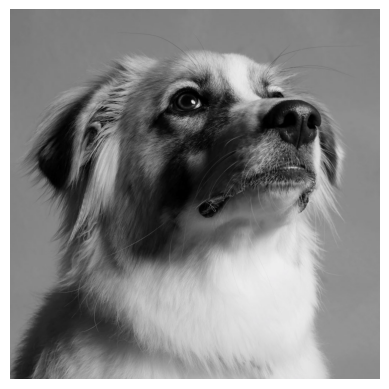

In [7]:
plt.imshow(img)
plt.axis('off')
plt.show()

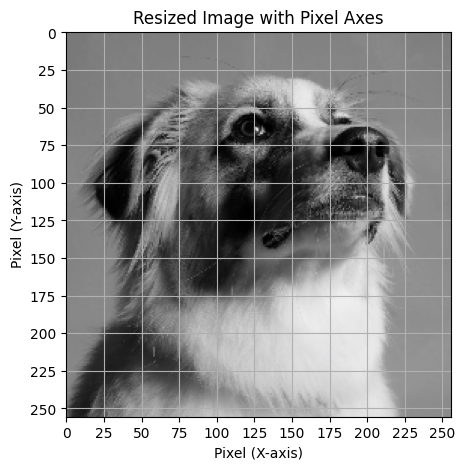

In [50]:
img_resized = cv2.resize(img, (256, 256))

plt.figure(figsize=(5, 5))
plt.imshow(img_resized)
plt.title("Resized Image with Pixel Axes")
plt.xlabel("Pixel (X-axis)")
plt.ylabel("Pixel (Y-axis)")
plt.xticks(range(0, 257, 25))  # Show ticks every 16 pixels
plt.yticks(range(0, 257, 25))
plt.grid(True)
plt.show()

## Sobel Kernels (Edge Detection)

In [18]:
sobel_x_3x3 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y_3x3 = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
], dtype=np.float32)

sobel_x_5x5 = np.array([
    [-2, -1, 0, 1, 2],
    [-3, -2, 0, 2, 3],
    [-4, -3, 0, 3, 4],
    [-3, -2, 0, 2, 3],
    [-2, -1, 0, 1, 2]
], dtype=np.float32)


## Laplacian Kernels (All-Direction Edges)

In [21]:
laplacian_3x3 = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float32)

## Gaussian Blur Kernels (Smoothing)

In [23]:
gaussian_3x3 = (1/16) * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32)

gaussian_5x5 = (1/273) * np.array([
    [1, 4, 7, 4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1]
], dtype=np.float32)

## Sharpen Kernels

In [26]:
sharpen_3x3 = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
], dtype=np.float32)

sharpen_5x5 = np.array([
    [0, 0, -1, 0, 0],
    [0, -1, -2, -1, 0],
    [-1, -2, 25, -2, -1],
    [0, -1, -2, -1, 0],
    [0, 0, -1, 0, 0]
], dtype=np.float32)

## Emboss Kernels

In [30]:
emboss_3x3 = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
], dtype=np.float32)

emboss_5x5 = np.array([
    [-2, -1, 0, 1, 2],
    [-1, -1, 0, 1, 1],
    [0, 0, 0, 0, 0],
    [1, 1, 0, -1, -1],
    [2, 1, 0, -1, -2]
], dtype=np.float32)

## Motion Blur Kernel (Horizontal)

In [32]:
motion_blur_5x5 = (1/5) * np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
], dtype=np.float32)

## All Combined

In [36]:
kernels = {
    'Sobel X 3x3': np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ], np.float32),

    'Sobel Y 3x3': np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ], np.float32),

    'Sobel X 5x5': np.array([
        [-5, -4, 0, 4, 5],
        [-8, -10, 0, 10, 8],
        [-10, -20, 0, 20, 10],
        [-8, -10, 0, 10, 8],
        [-5, -4, 0, 4, 5]
    ], np.float32),

    'Sobel Y 5x5': np.array([
        [-5, -8, -10, -8, -5],
        [-4, -10, -20, -10, -4],
        [0, 0, 0, 0, 0],
        [4, 10, 20, 10, 4],
        [5, 8, 10, 8, 5]
    ], np.float32),

    'Laplacian': np.array([
        [0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0]
    ], np.float32),

    'Laplacian Alt': np.array([
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]
    ], np.float32),

    'Gaussian 3x3': (1/16) * np.array([
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
    ], np.float32),

    'Gaussian 5x5': (1/273) * np.array([
        [1, 4, 7, 4, 1],
        [4, 16, 26, 16, 4],
        [7, 26, 41, 26, 7],
        [4, 16, 26, 16, 4],
        [1, 4, 7, 4, 1]
    ], np.float32),

    'Sharpen 3x3': np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ], np.float32),

    'Sharpen 5x5': np.array([
        [0, 0, -1, 0, 0],
        [0, -1, -2, -1, 0],
        [-1, -2, 25, -2, -1],
        [0, -1, -2, -1, 0],
        [0, 0, -1, 0, 0]
    ], np.float32),

    'Emboss': np.array([
        [-2, -1, 0],
        [-1, 1, 1],
        [0, 1, 2]
    ], np.float32),

    'Box Blur': (1/9) * np.ones((3, 3), np.float32),

    'Motion Blur': (1/5) * np.array([
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]
    ], np.float32)
}


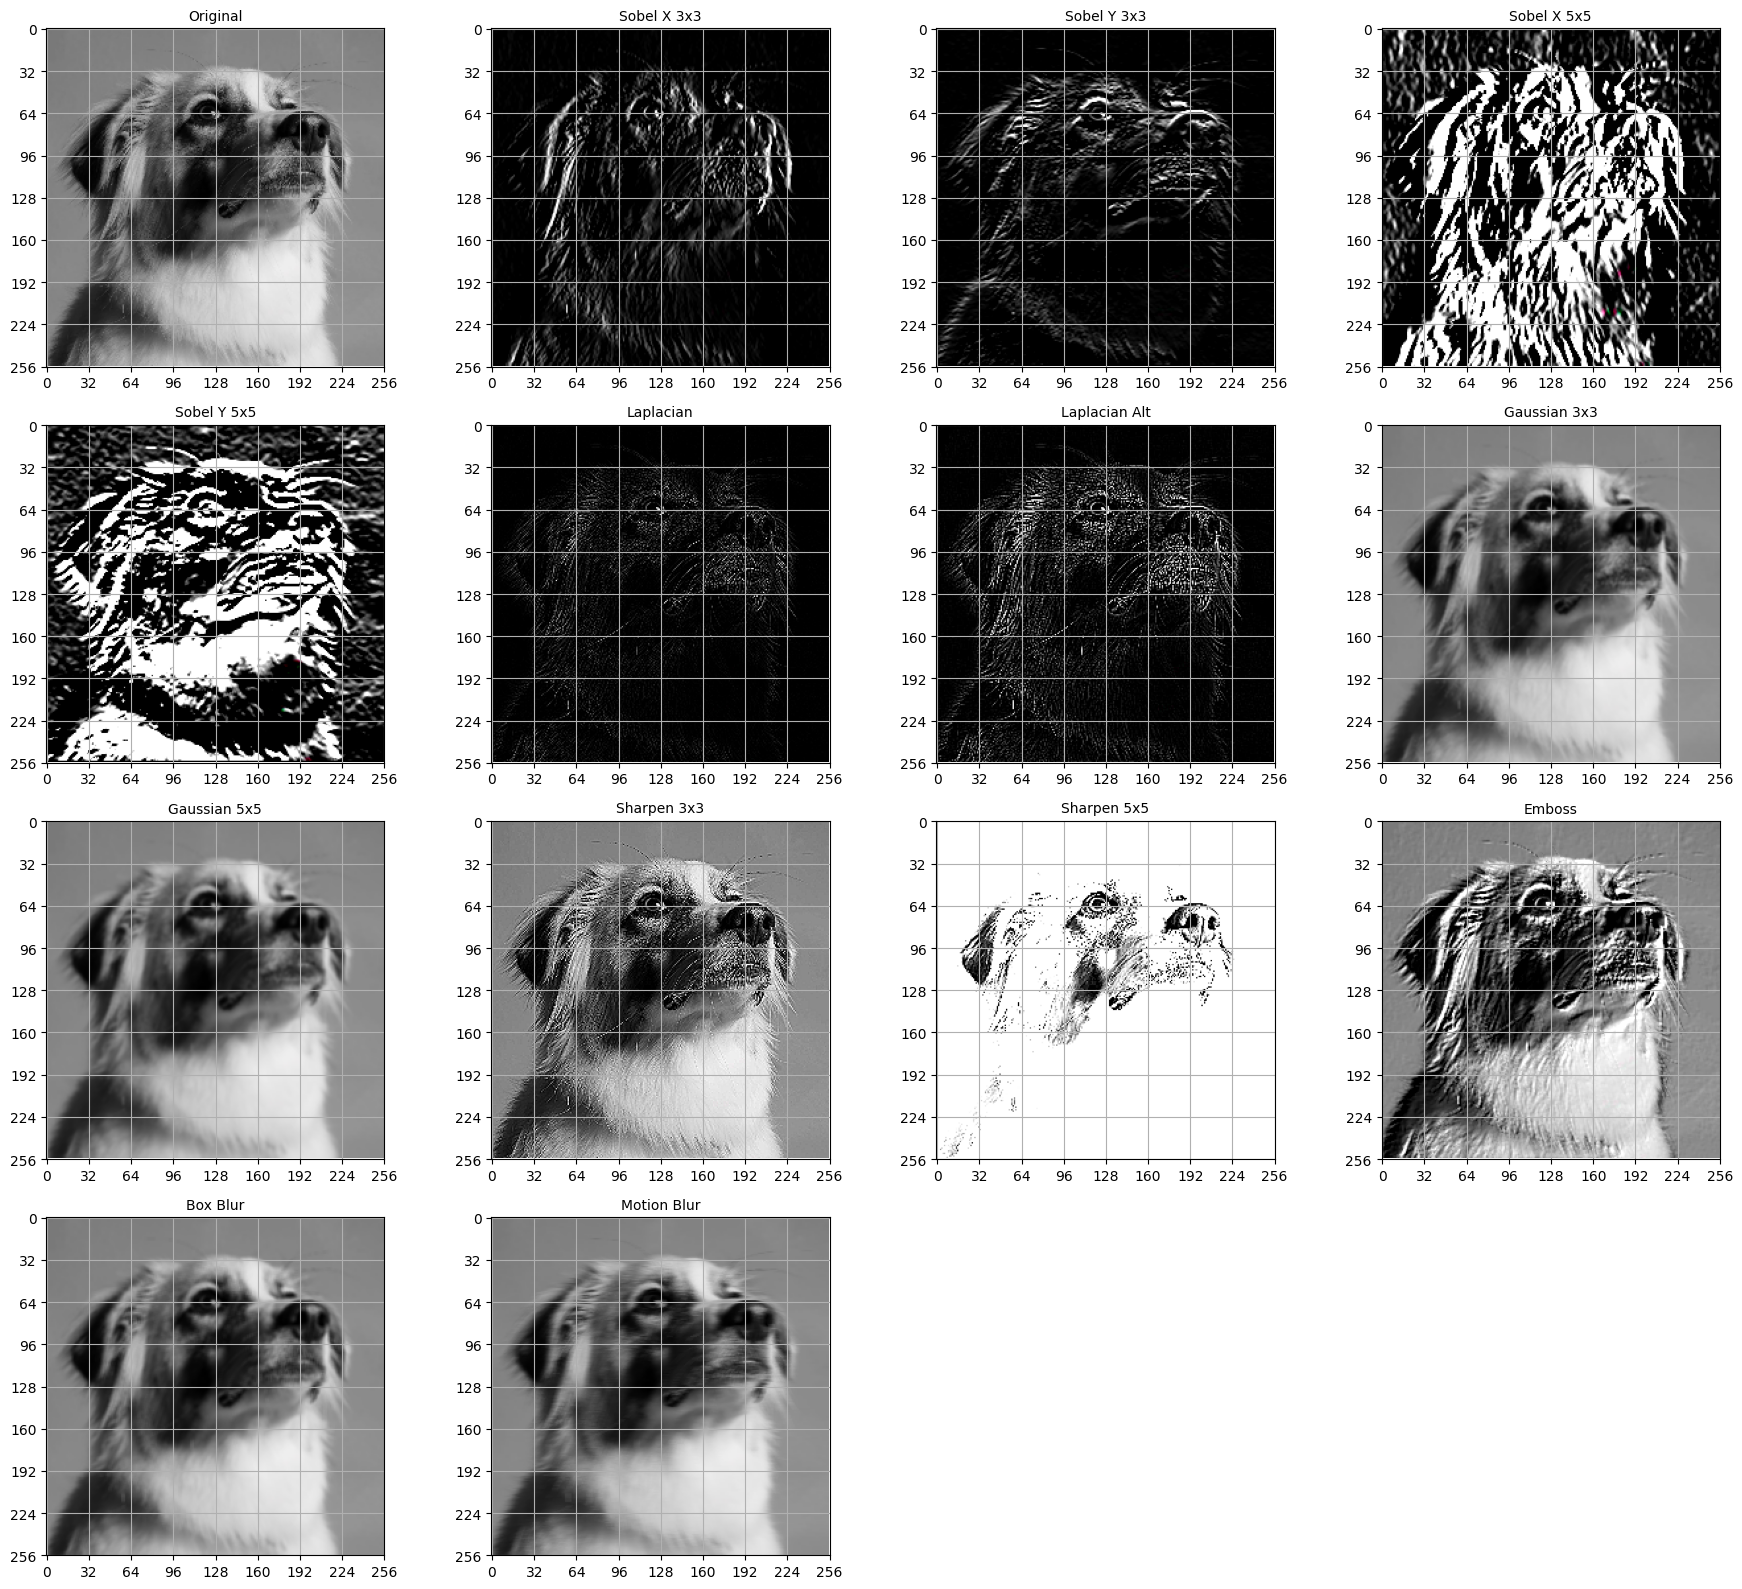

In [52]:
img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

results = {'Original': img_resized}
for name, kernel in kernels.items():
    filtered = cv2.filter2D(img_resized, -1, kernel)
    results[name] = filtered

n = len(results)
cols = 4
rows = int(np.ceil(n / cols))

plt.figure(figsize=(18, 4 * rows))
for i, (name, image) in enumerate(results.items()):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(image)
    plt.title(name, fontsize=10)
    plt.xticks(np.arange(0, 257, 32))
    plt.yticks(np.arange(0, 257, 32))
    plt.grid(True)

plt.tight_layout()
plt.show()